# ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# データの読み込み

In [2]:
pd.set_option('display.max_rows', 85)
df_train = pd.read_csv("data/input/train.csv")
df_test = pd.read_csv("data/input/test.csv")

# データの前処理

In [3]:
# データの結合
connection_df = pd.concat((df_train, df_test))
connection_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
# ["SalePrice"]の確認：describe
connection_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
connection_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [6]:
connection_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


# 欠損値の処理

In [4]:
# 欠損値の確認
connection_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
connection_df.describe(include=["O"])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [7]:
# 文字型の処理(欠損値が多いもの)
for col in ("Alley","MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure",
            "BsmtFinType1", "BsmtFinType2","FireplaceQu","GarageType",
            "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"):
    connection_df[col] = connection_df[col].fillna("None")

In [6]:
# 文字型の処理(欠損値が少ないもの)
for col in ("MSZoning", "Exterior1st", "Exterior2nd", "Electrical", "KitchenQual",
            "Functional", "SaleType"):
    connection_df[col] = connection_df[col].fillna(connection_df[col].mode()[0])

In [8]:
connection_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [10]:
connection_df = connection_df.drop(["Utilities"], axis=1)

In [11]:
connection_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       486
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          1
BsmtFinType2        0
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [12]:
for col in ("MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
            "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "GarageYrBlt","GarageCars",
            "GarageArea"):
    connection_df[col] = connection_df[col].fillna(0)

In [13]:
connection_df["LotFrontage"].value_counts()

LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
155.0      1
126.0      1
200.0      1
131.0      1
133.0      1
Name: count, Length: 128, dtype: int64

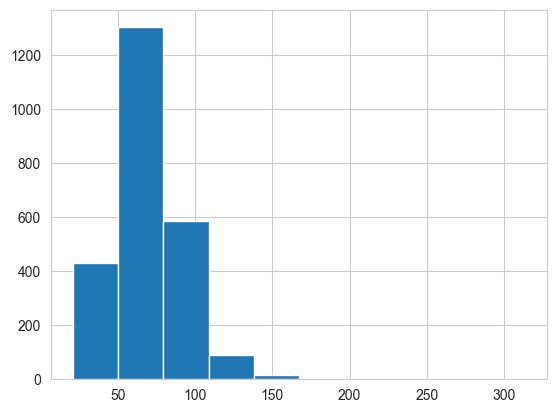

In [19]:
plt.hist(connection_df[["LotFrontage"]])
plt.show()

In [20]:
connection_df["LotFrontage"] = connection_df["LotFrontage"].fillna(connection_df["LotFrontage"].mode()[0])

In [21]:
connection_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

# 数値型と小数点型のみのデータでヒートマップを作成

In [22]:
connection_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object


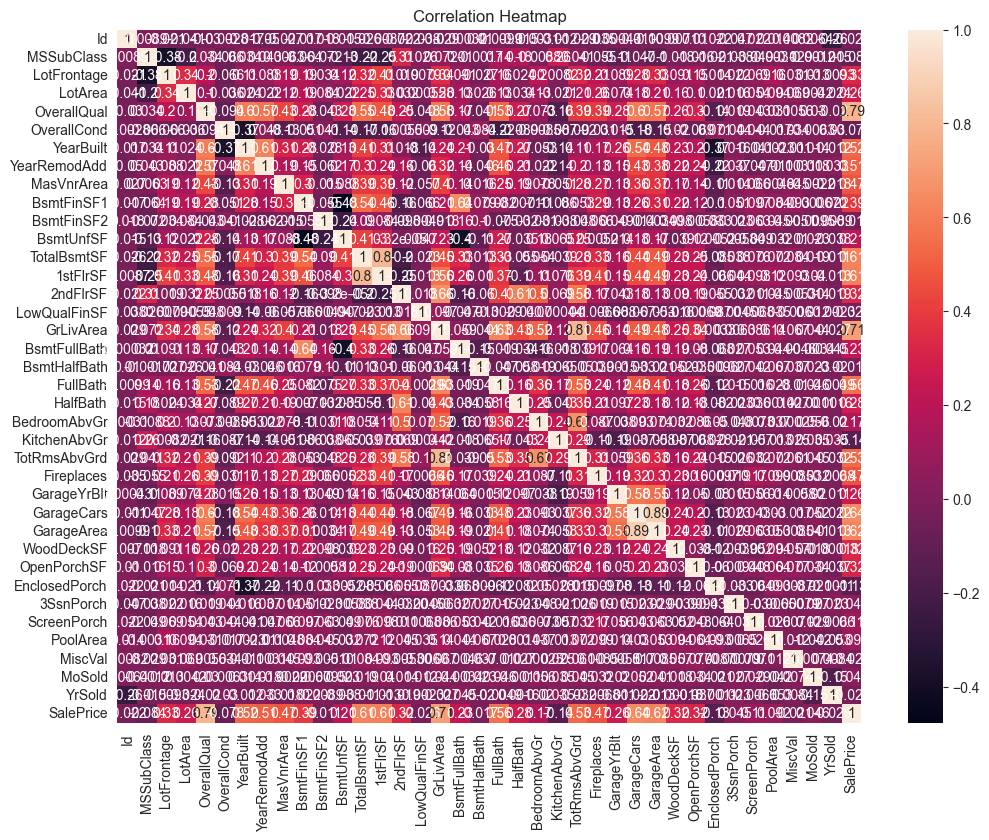

In [23]:
# ヒートマップ
plt.figure(figsize=(12,9))
sns.heatmap(connection_df.select_dtypes(include=[np.number, bool]).corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# SalesPriceとの相関の強さ（相関係数）を降順にソート
corr = connection_df.select_dtypes(include=[np.number, bool]).corr()
corr.sort_values("SalePrice", ascending=False)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.329220,0.263843,0.790982,-0.077856,0.522897,0.507101,0.472614,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.029771,0.033638,0.202094,0.100541,1.000000,-0.093847,0.597554,0.571532,0.426528,0.282150,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
GrLivArea,-0.029046,0.071677,0.337287,0.284519,0.575126,-0.116569,0.242666,0.316972,0.400088,0.211980,...,0.251017,0.341907,0.003274,0.006268,0.086284,0.135441,0.067118,0.044198,-0.026919,0.708624
GarageCars,-0.011249,-0.046794,0.279688,0.180379,0.600743,-0.181926,0.538611,0.425033,0.357845,0.255307,...,0.239973,0.203897,-0.134863,0.023444,0.043299,0.030446,-0.016847,0.051763,-0.022417,0.640409
GarageArea,-0.009851,-0.103534,0.328834,0.213180,0.565179,-0.154312,0.481328,0.375892,0.371071,0.310219,...,0.237385,0.232876,-0.108382,0.029493,0.062552,0.053053,0.008506,0.041182,-0.012986,0.623431
TotalBsmtSF,-0.025538,-0.219008,0.324456,0.254316,0.549763,-0.174837,0.408750,0.299019,0.393715,0.536650,...,0.229960,0.245835,-0.085131,0.037940,0.075522,0.072197,0.083993,0.018535,-0.011302,0.613581
1stFlrSF,-0.008678,-0.248641,0.412879,0.332460,0.479152,-0.157418,0.310814,0.242245,0.392367,0.458206,...,0.227347,0.238502,-0.065796,0.044086,0.098381,0.121900,0.093062,0.040143,-0.013442,0.605852
FullBath,-0.009946,0.139140,0.157540,0.125826,0.528483,-0.215504,0.471169,0.457980,0.254085,0.081838,...,0.181266,0.260423,-0.118983,0.015192,-0.015910,0.028091,-0.010024,0.046274,-0.004882,0.560664
TotRmsAbvGrd,-0.029368,0.040509,0.315235,0.213802,0.389761,-0.092027,0.114280,0.198250,0.277103,0.052629,...,0.156543,0.238156,0.015345,-0.025764,0.032324,0.072061,0.060903,0.045137,-0.032354,0.533723
YearBuilt,-0.016581,0.034409,0.105705,0.024128,0.597554,-0.368477,1.000000,0.612235,0.307520,0.279780,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897


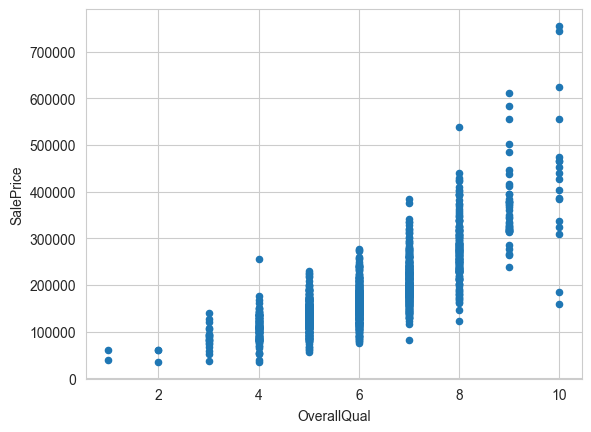

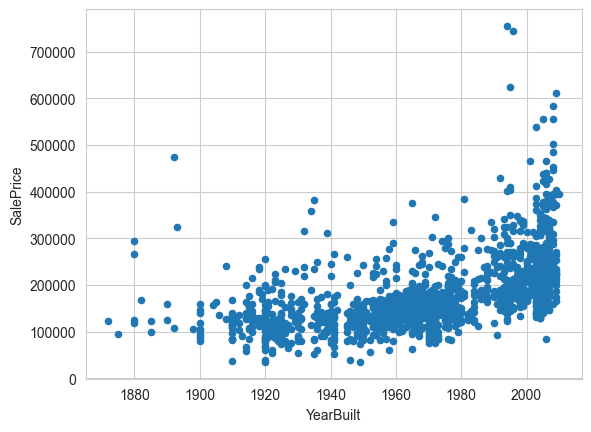

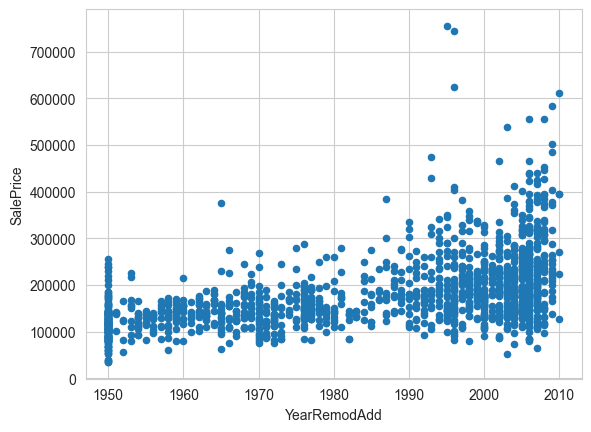

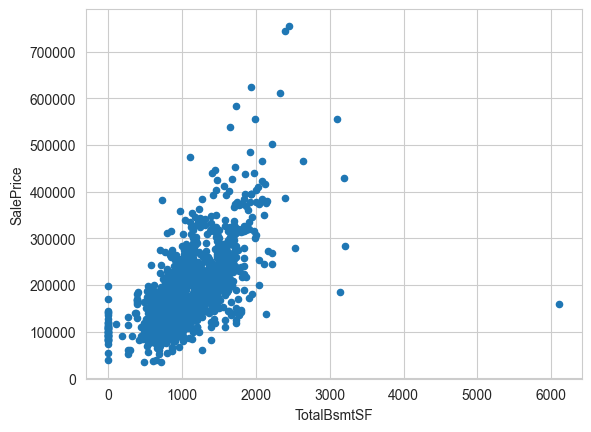

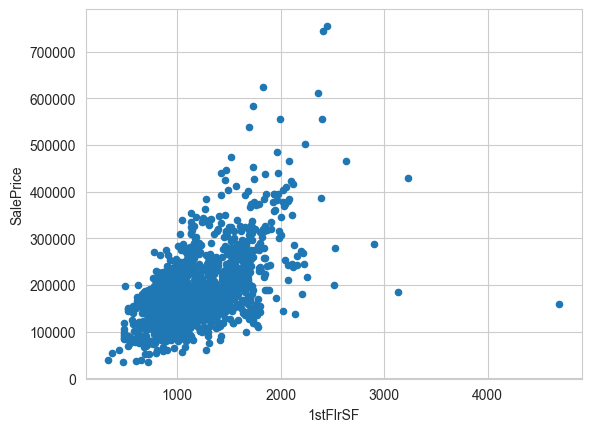

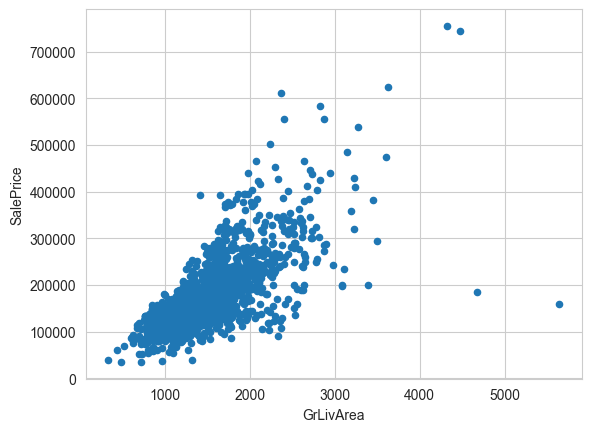

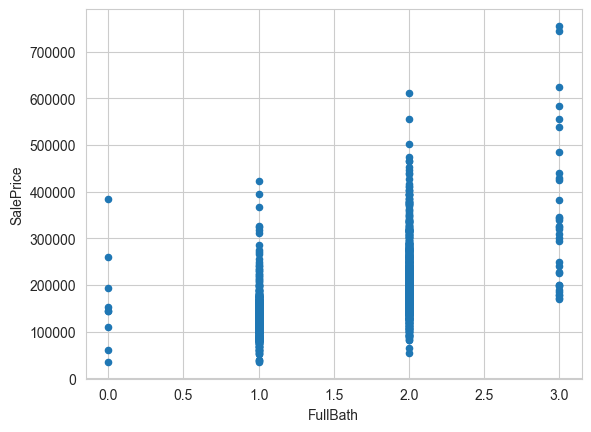

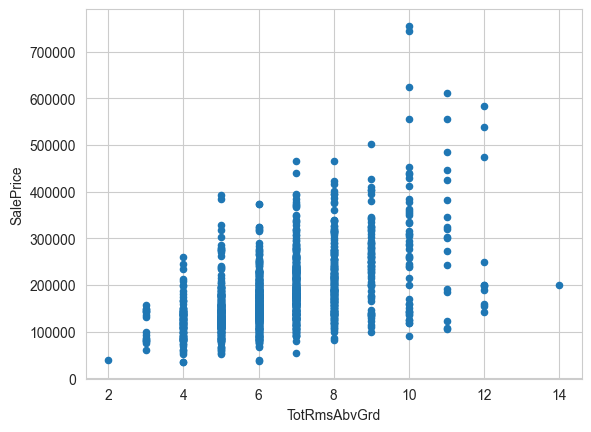

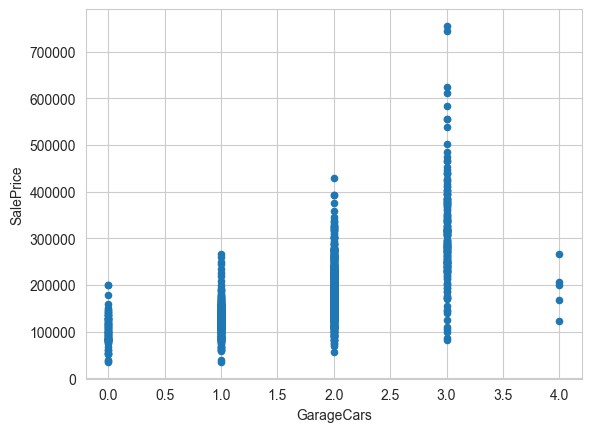

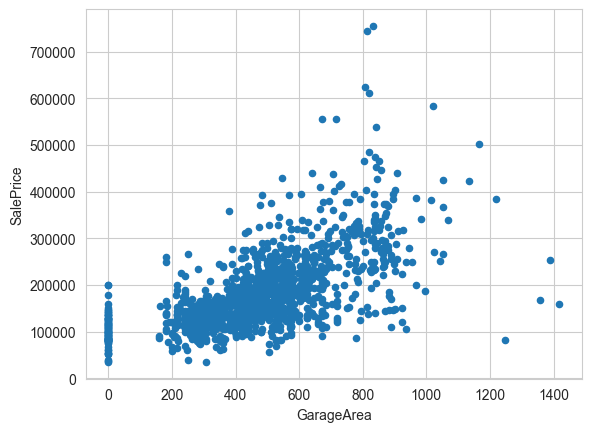

In [25]:
# 散布図行列の表示
pals = ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF","GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea"]
for pal in pals:
    connection_df.plot.scatter(x=pal, y="SalePrice")

# エンコーディング

In [26]:
# ラベルエンコーディング
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cols:
    lbl = LabelEncoder()
    lbl.fit(list(connection_df[col].values))
    connection_df[col] = lbl.transform(list(connection_df[col].values))

In [27]:
# ワンホットエンコーディング（ラベルエンコーディング済みのものは対象外になる）
connection_df = pd.get_dummies(connection_df, drop_first=True)

In [28]:
connection_df

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,5,65.0,8450,1,1,3,0,7,4,...,False,False,False,False,True,False,False,False,True,False
1,2,0,80.0,9600,1,1,3,0,6,7,...,False,False,False,False,True,False,False,False,True,False
2,3,5,68.0,11250,1,1,0,0,7,4,...,False,False,False,False,True,False,False,False,True,False
3,4,6,60.0,9550,1,1,0,0,7,4,...,False,False,False,False,True,False,False,False,False,False
4,5,5,84.0,14260,1,1,0,0,8,4,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,13,21.0,1936,1,1,3,0,4,6,...,False,False,False,False,True,False,False,False,True,False
1455,2916,13,21.0,1894,1,1,3,0,4,4,...,False,False,False,False,True,False,False,False,False,False
1456,2917,0,160.0,20000,1,1,3,0,5,6,...,False,False,False,False,True,False,False,False,False,False
1457,2918,9,62.0,10441,1,1,3,0,5,4,...,False,False,False,False,True,False,False,False,True,False


In [29]:
connection_df.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
Street                   0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 202, dtype: int64

In [30]:
connection_df.to_csv("data/input/pretreatment_data02.csv", index=False)